## Assignment: Part I


**Overview of the problem statement**<br>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief. 

 
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
 

Objective is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and to suggest the countries which the CEO needs to focus on the most.  



### The steps which are followed below are broadly:

1. Read and understand the data - data inspection 
2. Clean the data, univariate analysis, bivariate analysis etc.
3. Outlier Analysis
4. Prepare the data for modelling 
5. Modelling - Try both K-means and Hierarchical clustering(both single and complete linkage)
6. Analysis - using gdpp, child_mort and income to analyse the clusters and identify the ones which are in dire need of aid
7. Visualisations on the clusters for the three pairs
8. The final list of countries.


# 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
ngo = pd.read_csv("Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country = pd.Series(ngo['country'])
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [4]:
ngo['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [5]:
#dropping the country column

ngo_df = ngo.drop('country',axis = 1)
ngo_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# basics of the df
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [7]:
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#checking for shape
ngo_df.shape

(167, 9)

In [9]:
#chceking for null values

ngo_df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
ngo_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


As the export, health amd import are given as percentage of the GDP per capita. Converting these percentages to the actual value

In [11]:
ngo_df['exports'] = (ngo_df['exports'] / 100) * ngo_df['gdpp']
ngo_df['health'] = (ngo_df['health'] / 100) * ngo_df['gdpp']
ngo_df['imports'] = (ngo_df['imports'] / 100) * ngo_df['gdpp']

In [12]:
ngo_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA

<Figure size 1440x720 with 0 Axes>

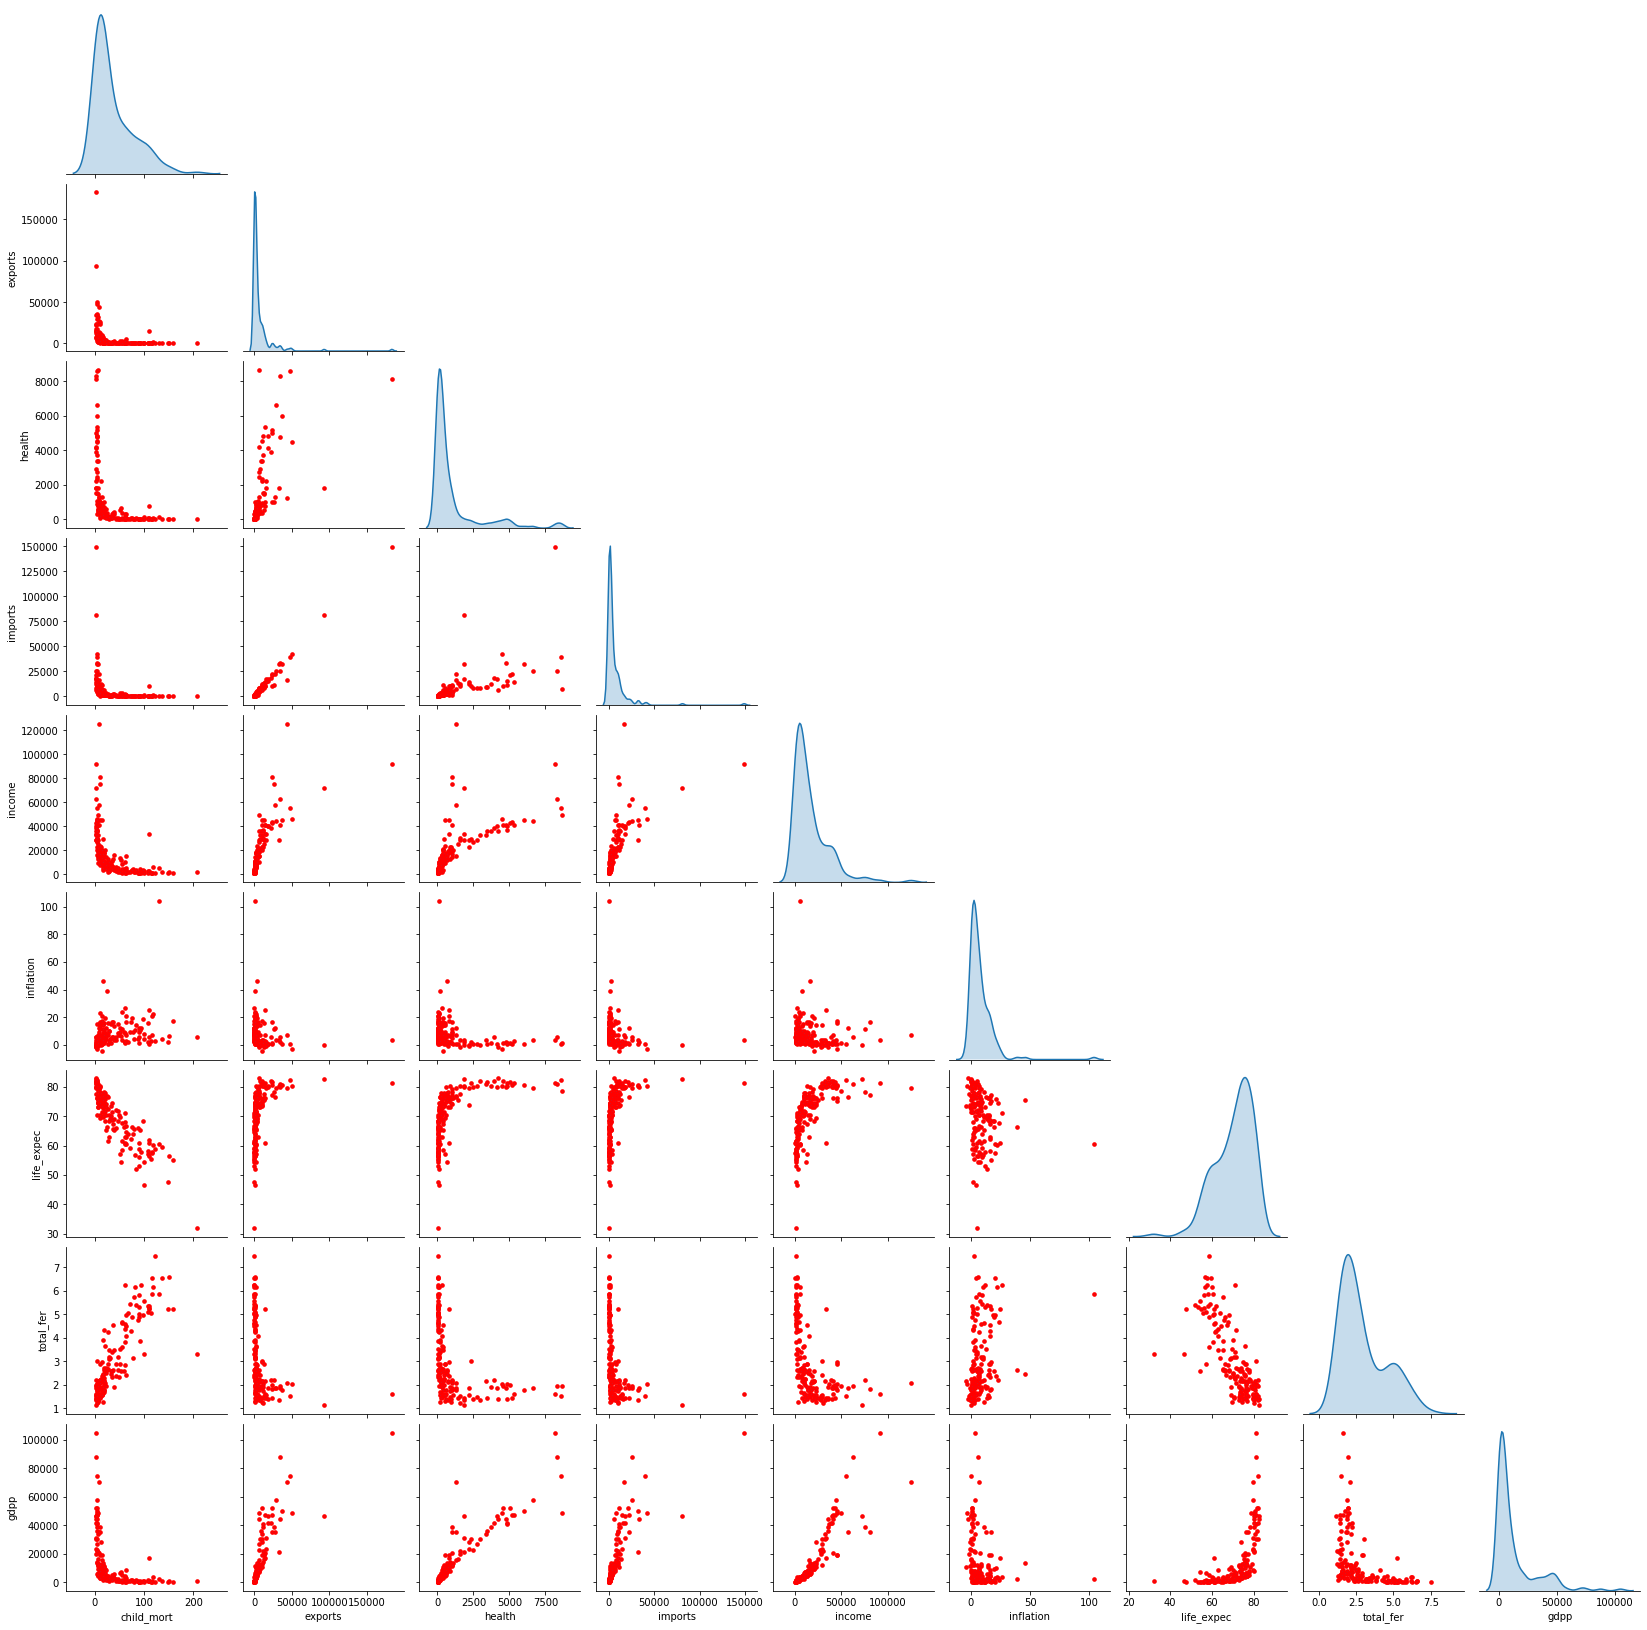

In [13]:
#pairplot of numerical variables
plt.figure(figsize = (20,10))
sns.pairplot(ngo_df,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=2))
plt.show()


In [14]:
features = ngo_df.columns
print("Different columns to be considered - ",features,'\n')
for i in enumerate(features):
    print(i)

Different columns to be considered -  Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') 

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


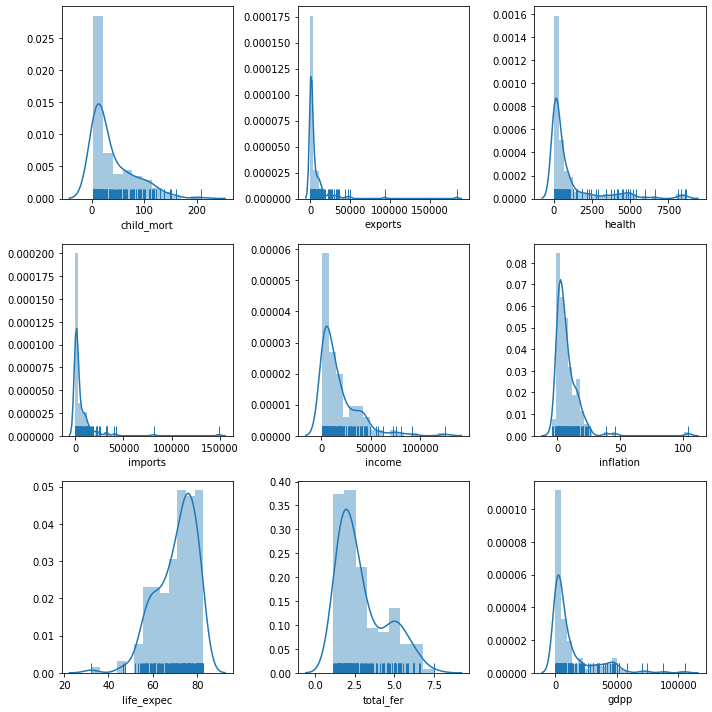

In [15]:
#Plotting distplot for all the columns

plt.figure(figsize = (10,10))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(ngo_df[i[1]], rug=True)
    plt.tight_layout()

## Analyzying above graphs:

 * child_mort - From the above graph of child mortality, we could say that most number of death are happening 0 to 10 approaximately and gradualy the count drops. Also the distplot is right skewed
 
 
 * exports - From the above graph of exports, we could say that highest export of goods and services per capita is at the starting. We could see it is kind of normally distributed but a bit skewed from the right.
 
 
 * health - Total health spending per capita has its peak at first and slowly drops 
 
 * imports - Imports of goods and services per capita has an almost similar distribution with its peak at the starting. It is having an kind of normal distribution but is right skewed.
 
 * income - Net income per person is highest at approax 0-10000 and slowly it reduces.
 
 
 * inflation - The measurement of the annual growth rate of the GDP deflator is highest at 5 and it is having a kind of normal distribution but is a right skewed a bit
 
 
 * life_expec - The life expectancy has its peak at around 80. We can say that it is kind of normally distributed with mean around 75. The distribution is left skewed. 
 
 
 * total_fer - From the above graph of total fertility, we could see the peak at 2.5 approax and gradualy the count drops till 3.5 approax and again rises at 5 and then frops again.
 
 
 * GDPP - From the above graph of GDP, we could say that it is highest at the starting and drops and again increase at 50000 for a bit and then drops again.
 

In [16]:
ngo_df.life_expec.describe()


count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

Average life expectancy: 70.56 (highly negatively skewed distribution)

In [17]:
ngo_df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [18]:
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [19]:
ngo_df.health.describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

In [20]:
ngo_df.total_fer.describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

In [21]:
ngo_df.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [22]:
ngo_df.child_mort.describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

Average death of children under age 5 in every 100 people: 38.27


### Univariate Analysis for Continuous Variable

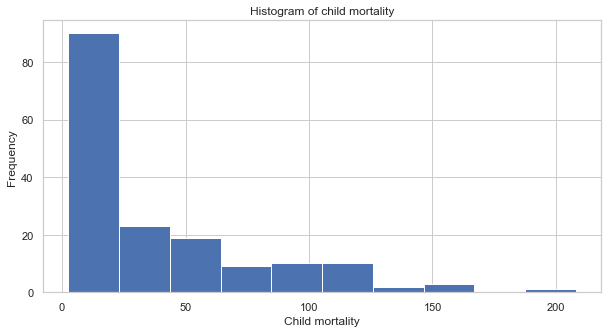

In [23]:
# Plotting Child mortality.
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.title("Histogram of child mortality")
plt.ylabel("Frequency")
plt.xlabel("Child mortality")
plt.hist(ngo_df.child_mort,bins =10)
plt.show()

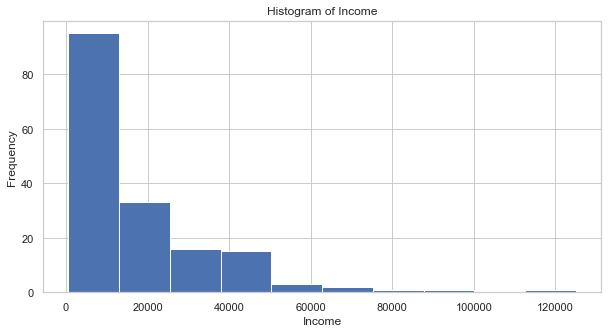

In [24]:
# Plotting Income.
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.title("Histogram of Income")
plt.ylabel("Frequency")
plt.xlabel("Income")
plt.hist(ngo_df.income,bins =10)
plt.show()

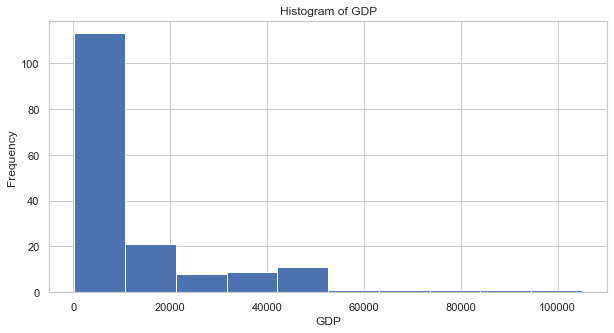

In [25]:
# Plotting GDPP.
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.title("Histogram of GDP")
plt.ylabel("Frequency")
plt.xlabel("GDP")
plt.hist(ngo_df.gdpp,bins =10)
plt.show()

### Correlation 

In [26]:
#correlated values 

corr1 = ngo_df.corr()
corr1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [27]:
#removing the reapeated correlated columns
corr1_df1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df1 = corr1_df1.unstack().reset_index().dropna(subset =[0]).sort_values(by = 0,ascending = False).head(10)
corr1_df1.columns = ["Variable 1", "Variable 2","Correlation Value"]
corr1_df1

,Variable 1,Variable 2,Correlation Value
28,imports,exports,0.987686
74,gdpp,health,0.916593
76,gdpp,income,0.895571
63,total_fer,child_mort,0.848478
73,gdpp,exports,0.768894
75,gdpp,imports,0.755114
37,income,exports,0.725351
38,income,health,0.690857
39,income,imports,0.672056
29,imports,health,0.638581


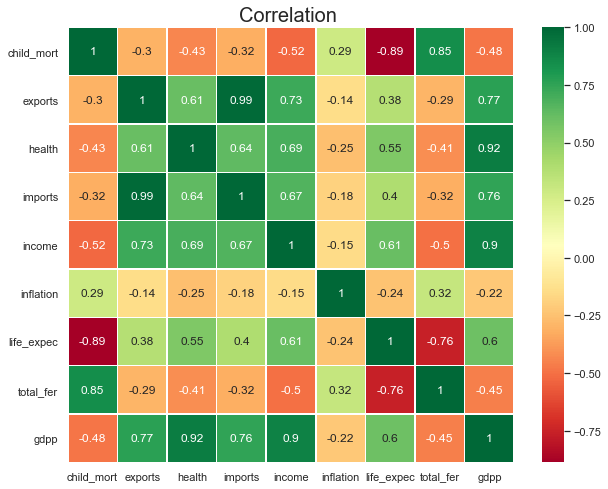

In [28]:
plt.figure(figsize = (10,8))

ax = plt.axes()
sns.heatmap(ngo_df.corr(),annot = True, linewidth = 0.5,cmap = "RdYlGn")
ax.set_title("Correlation ", fontsize =20)
plt.show()

Observations from the graph above:

- import and export are the highly correlated variables with correlation value of 0.987686. Also, GDP and health are also strongly correlated with correlation value of 0.916593. Since Export and import go hand in hand in any country this would justify, high correlation between these two seen in the heatmap.

- On the other hand life_expec and child mortality are the columns which are negatively correlated with the correlation value of -0.89. Also, life_expec and total_fer are ones which are negatively correlated column hving correlation magnitude of -0.76. 



### Bivariate Analysis for Continuous~Continuous columns

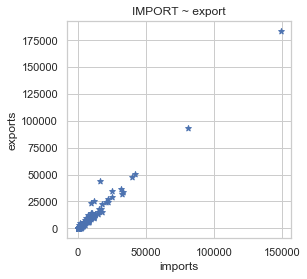

In [29]:
# Plotting IMPORT against EXPORT

sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
plt.title("IMPORT ~ export")
plt.scatter(ngo_df.imports,ngo_df.exports,marker = '*')
plt.ylabel("exports")
plt.xlabel("imports")
plt.show()

As the export increase, import is also increasing

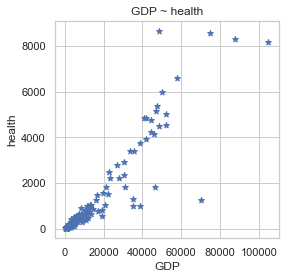

In [30]:
# Plotting GDP against health

sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
plt.title("GDP ~ health")
plt.scatter(ngo_df.gdpp,ngo_df.health,marker = '*')
plt.ylabel("health")
plt.xlabel("GDP")
plt.show()

Graph shows better the health better the GDP will be

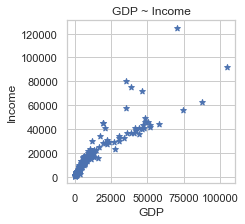

In [31]:
# Plotting GDP against INCOME

sns.set(style="whitegrid")
plt.figure(figsize=(3,3))
plt.title("GDP ~ Income")
plt.scatter(ngo_df.gdpp,ngo_df.income,marker = '*')
plt.ylabel("Income")
plt.xlabel("GDP")
plt.show()

Income and GDP are positively related, we can observe from the graph that as GDP increases Income also increases

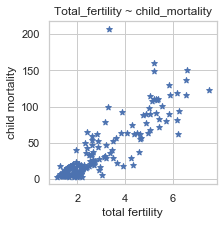

In [32]:
# Plotting total_fertility against child_mortality 

sns.set(style="whitegrid")
plt.figure(figsize=(3,3))
plt.title("Total_fertility ~ child_mortality")
plt.scatter(ngo_df.total_fer,ngo_df.child_mort,marker = '*')
plt.ylabel("child mortality")
plt.xlabel("total fertility")
plt.show()

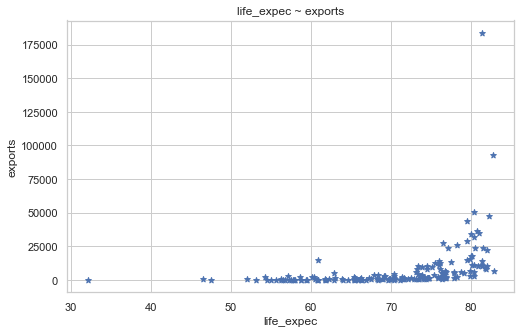

In [33]:
# Plotting life_expec and exports 

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
plt.title("life_expec ~ exports")
plt.scatter(ngo_df.life_expec,ngo_df.exports,marker = '*')
plt.ylabel("exports")
plt.xlabel("life_expec")
plt.show()

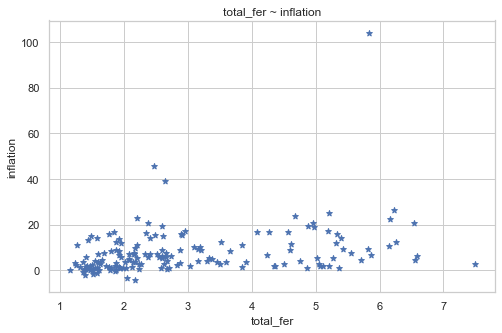

In [34]:
# Plotting total_fer and inflation

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
plt.title("total_fer ~ inflation")
plt.scatter(ngo_df.total_fer,ngo_df.inflation,marker = '*')
plt.ylabel("inflation")
plt.xlabel("total_fer")
plt.show()

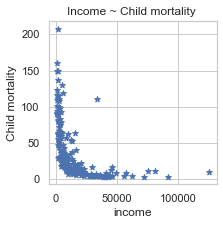

In [35]:
# Plotting INCOME against child_mortality 

sns.set(style="whitegrid")
plt.figure(figsize=(3,3))
plt.title("Income ~ Child mortality ")
plt.scatter(ngo_df.income,ngo_df.child_mort,marker = '*')
plt.ylabel("Child mortality")
plt.xlabel("income")
plt.show()

We could observe from the above plot that for low income the child mortality is high and as income increase child mortality is also very less

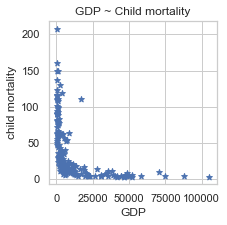

In [36]:
# Plotting GDP against child_mortality 

sns.set(style="whitegrid")
plt.figure(figsize=(3,3))
plt.title("GDP ~ Child mortality")
plt.scatter(ngo_df.gdpp,ngo_df.child_mort,marker = '*')
plt.ylabel("child mortality")
plt.xlabel("GDP")
plt.show()

We could observe from the above plot that for low GDP the child mortality is high and as GDP increase child mortality is also very less

### Checking outliers for different numeric columns

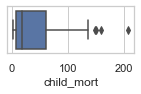

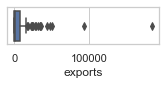

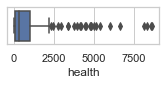

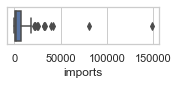

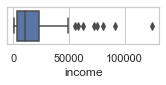

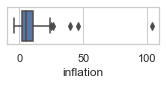

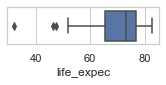

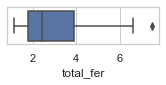

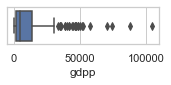

In [37]:
plt.figure(figsize = (5,5))
features = ngo_df.columns
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(ngo_df[i[1]])
    plt.show()

- All continuous variables are having outliers
- Except life_expec all other variables are having higher outlires
- There are very less outliers present for life_expec and total_fer features.


### Capping  lower values of child mortality, inflation and import. Also capping higher values of export, income, health and gdp

In [38]:
child_mort_q1 = ngo_df['child_mort'].quantile(0.01)
ngo_df['child_mort'][ngo_df['child_mort']< child_mort_q1] = child_mort_q1


inflation_q1 = ngo_df['inflation'].quantile(0.01)
ngo_df['inflation'][ngo_df['inflation']< inflation_q1] = inflation_q1

In [39]:
export_q4 = ngo_df['exports'].quantile(0.99)
ngo_df['exports'][ngo_df['exports']> export_q4] = export_q4


import_q4 = ngo_df['imports'].quantile(0.01)
ngo_df['imports'][ngo_df['imports']< import_q4] = import_q4


income_q4 = ngo_df['income'].quantile(0.99)
ngo_df['income'][ngo_df['income']> income_q4] = income_q4


health_q4 = ngo_df['health'].quantile(0.99)
ngo_df['health'][ngo_df['health']> health_q4] = health_q4


gdpp_q4 = ngo_df['gdpp'].quantile(0.99)
ngo_df['gdpp'][ngo_df['gdpp']> gdpp_q4] = gdpp_q4



In [40]:
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,6589.062385,16857.550898,7.798194,70.555689,2.947964,12756.826347
std,40.327869,11415.308590,1790.845342,14710.493206,17957.012855,10.553699,8.893172,1.513848,17430.208938
min,2.800000,1.076920,12.821200,104.909640,609.000000,-2.348800,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,149100.000000,84374.000000,104.000000,82.800000,7.490000,79088.000000


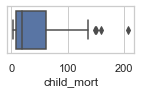

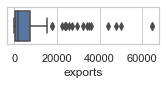

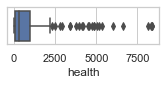

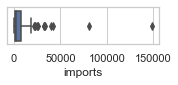

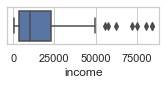

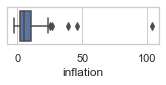

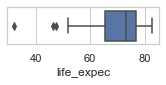

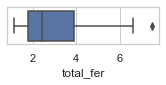

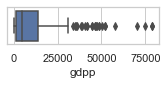

In [41]:
plt.figure(figsize = (5,5))
features = ngo_df.columns
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(ngo_df[i[1]])
    plt.show()

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, i.e how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
sumhop = 0
for i in range(1,11):
    hop = hopkins(ngo_df)
    sumhop = sumhop + hop
avghop = sumhop / 10
avghop

0.94097102017981

As the average hopkins score is high, when ran for 10 times, We could conclude that data has high tendency to cluster

### Scaling

In [44]:
scaler = StandardScaler()
ngo_df_scaled = scaler.fit_transform(ngo_df)
ngo_df_scaled

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

# K mean Clustering

### Steps to be followed
* Choose value of K
* Silhouette Score
* Elbow curve ssd


In [45]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

## Finding the Optimal Number of Clusters

### SSD

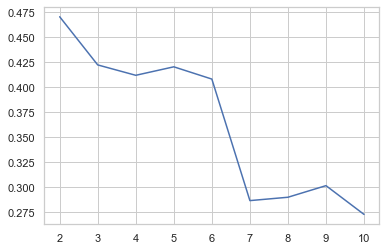

In [46]:
# SSD
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(ngo_df_scaled)
    ss.append([k,silhouette_score(ngo_df_scaled,kmeans.labels_,random_state=True)])

temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

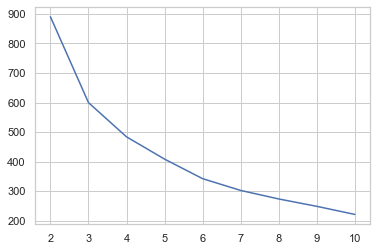

In [47]:
# elbow-curve
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(ngo_df_scaled)
    ssd.append([k,kmeans.inertia_])

temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

Using the above graph of elbow and silhouette, we could conclude that the Optimum number of cluster here could be 3. As we can see a change of slope from steep to shallow (an elbow) at 3, we can determine that the optimal number of clusters will be 3 here.

Also using the average silhouette method which computes the average silhouette of observations for different values of k. Even though the average silhouette is maximum at k = 2, but using two cluster would just divide the data in two halves. So over a range of possible values for k, we can conclude the optimal number of clusters is k = 3.

In [48]:
# final K mean clustering model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(ngo_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [49]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [50]:
#creating a copy of data

ngo_df_kmean = ngo
ngo_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [51]:
label = pd.DataFrame(kmeans.labels_,columns =['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [52]:
ngo_df_kmean = pd.concat([ngo_df_kmean,label],axis =1)
ngo_df_kmean

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [53]:
ngo_df_kmean.label.value_counts()

0    92
2    48
1    27
Name: label, dtype: int64

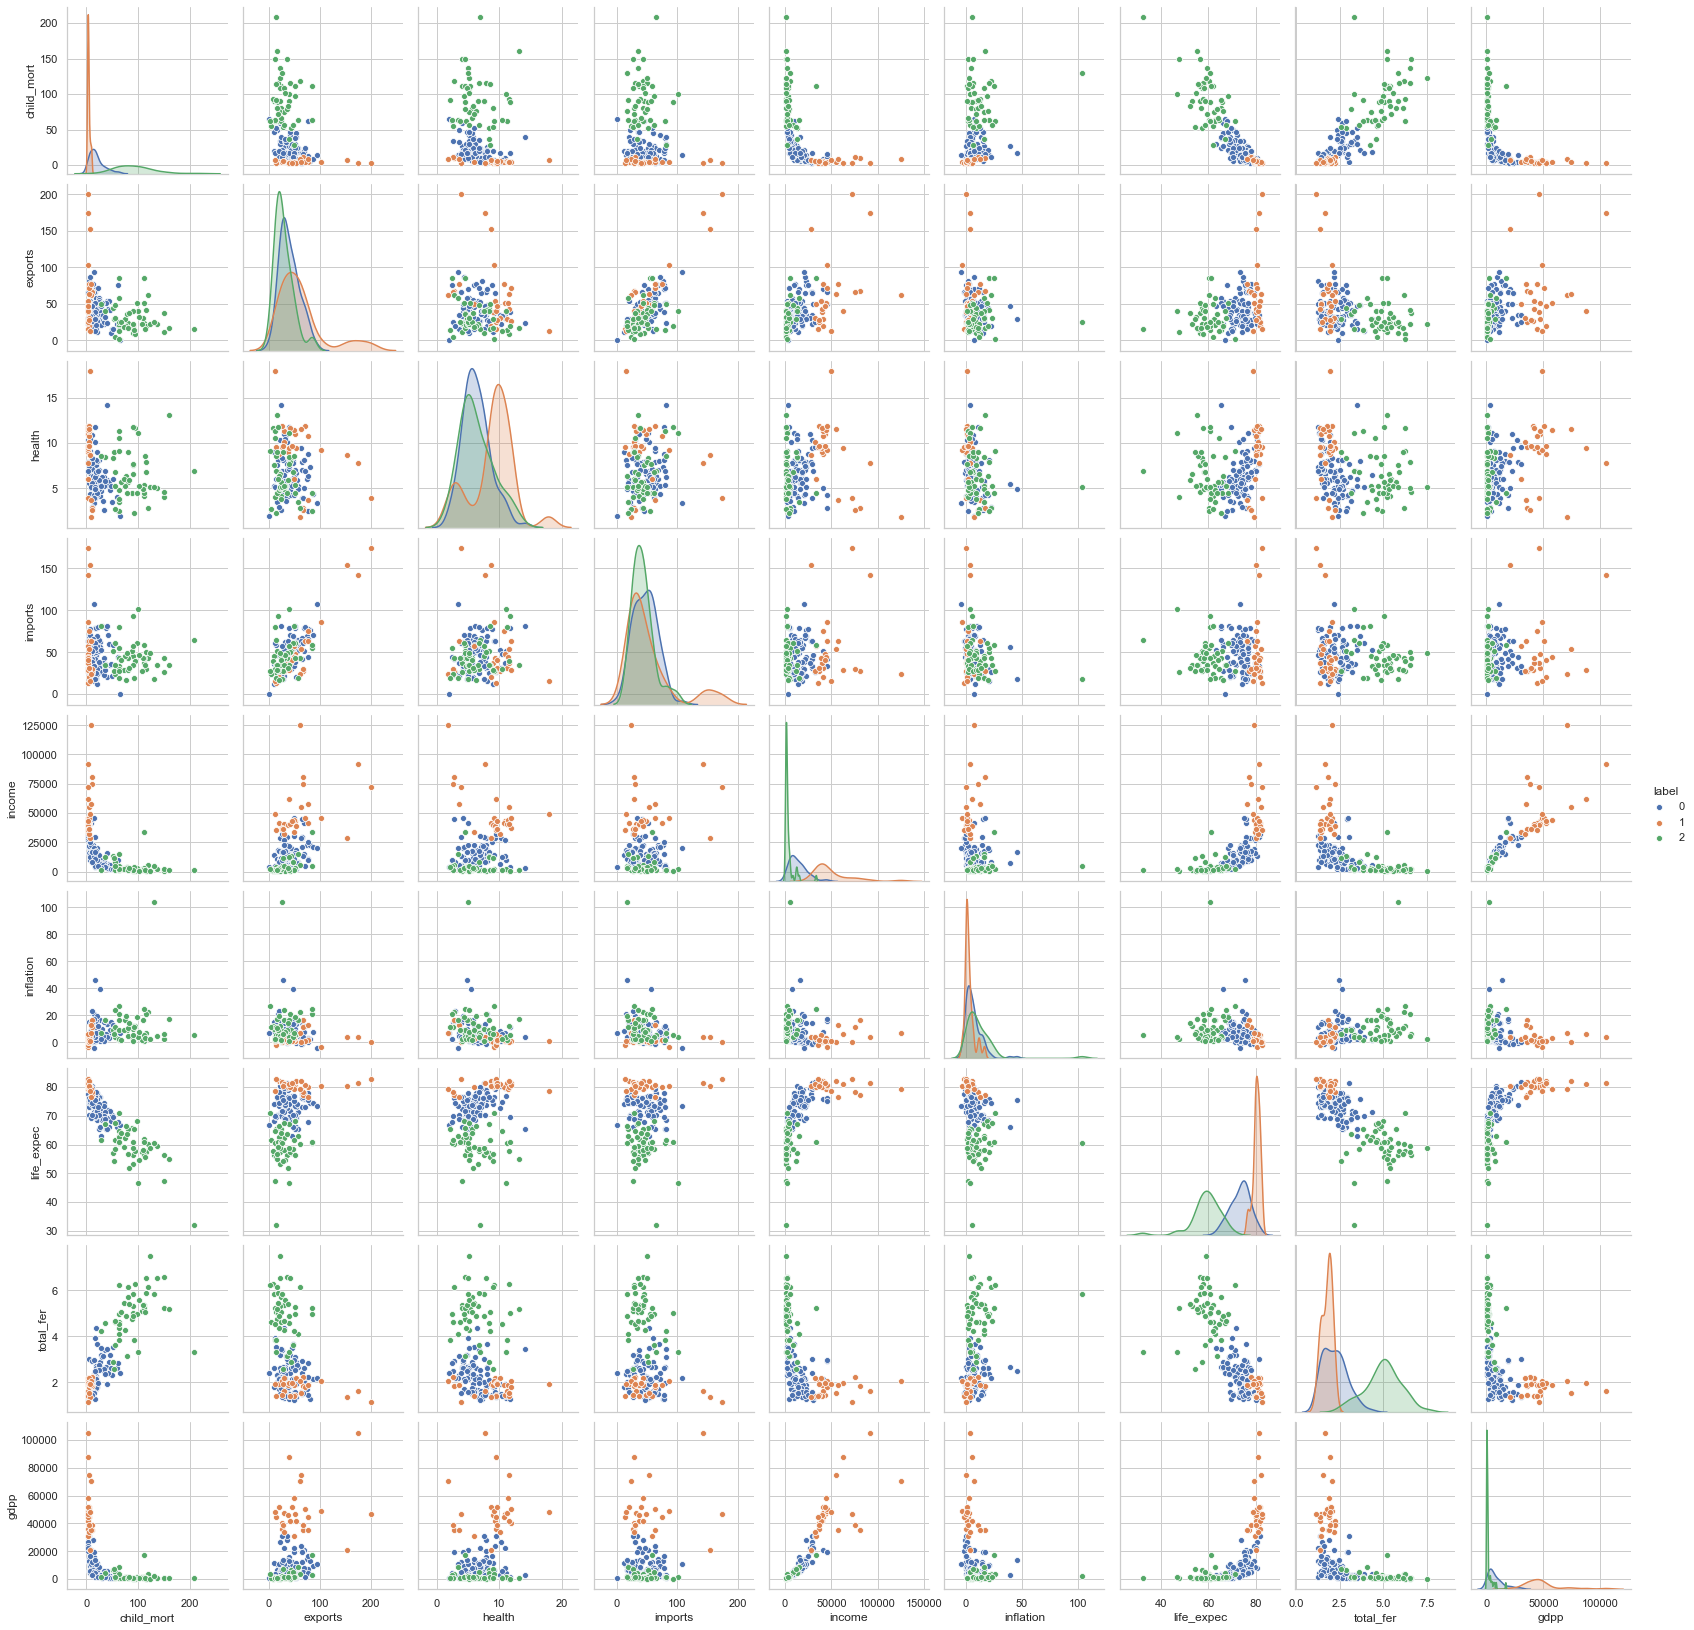

In [54]:
sns.pairplot(ngo_df_kmean,diag_kind='kde',hue='label')

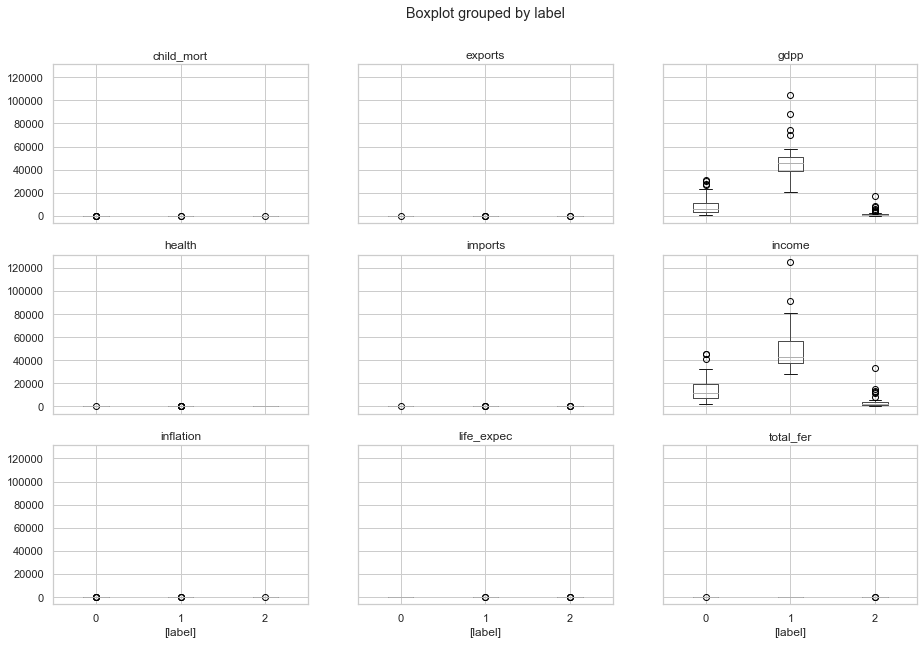

In [55]:
ngo_df_kmean.boxplot(by ='label',figsize=(15, 10))
plt.show()

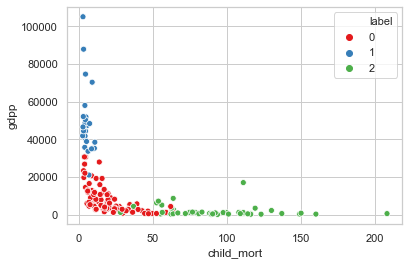

In [56]:
#plot the cluster

sns.scatterplot(x ='child_mort', y = 'gdpp', hue = 'label', data = ngo_df_kmean,palette = 'Set1')

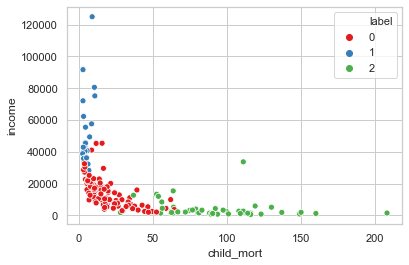

In [57]:
#plot the cluster

sns.scatterplot(x ='child_mort', y = 'income', hue = 'label', data = ngo_df_kmean,palette = 'Set1')

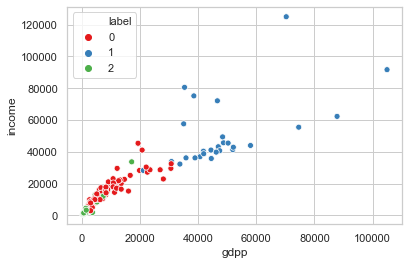

In [58]:
#plot the cluster

sns.scatterplot(x ='gdpp', y = 'income', hue = 'label', data = ngo_df_kmean,palette = 'Set1')

Above scatter plot shows three clusters based on income , GDP and child mortality

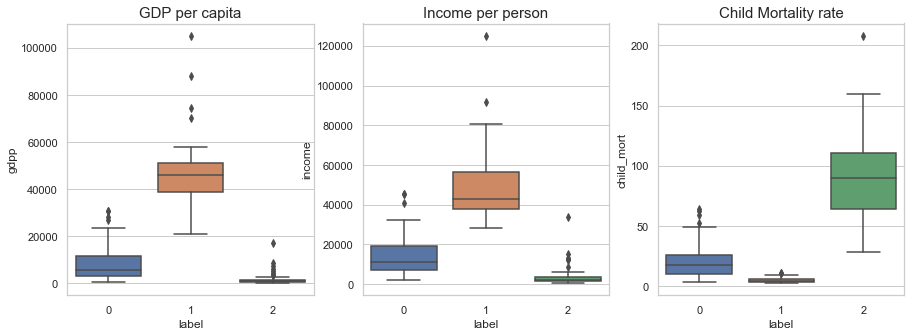

In [59]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='label',y='gdpp',data=ngo_df_kmean,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='label',y='income',data=ngo_df_kmean,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='label',y='child_mort',data=ngo_df_kmean,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
plt.show()

### Cluster Profiling

Using gdpp, child_mort and income for Cluster Profiling  

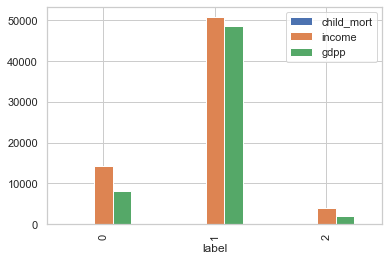

In [60]:
ngo_df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

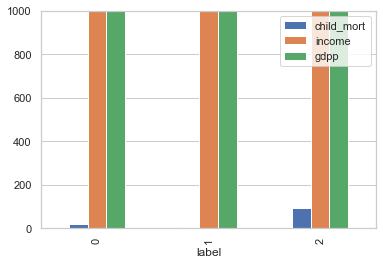

In [61]:
ngo_df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.ylim(0,1000)
plt.show()

- Cluster 0:  Average child mortality and verage income and GDP
- Cluster 1: low child mortality and high income and GDP
- Cluster 2: High child mortality and low income and GDP

Filtering data for Cluster with label 0: As countries belong to Cluster 0 are in dire need of aid Having Highest child mortality, lowest income, lowest GDP 

In [62]:
ngo_df_kmean[ngo_df_kmean['label']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


Identifying the countries which is having highest child mortality, lowest income, lowest GDP 

In [63]:
ngo_df_kmean[ngo_df_kmean['label']==2].sort_values(by=['gdpp','income','child_mort'],ascending =[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2


## Hierarchical Clustering

In [64]:
ngo_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


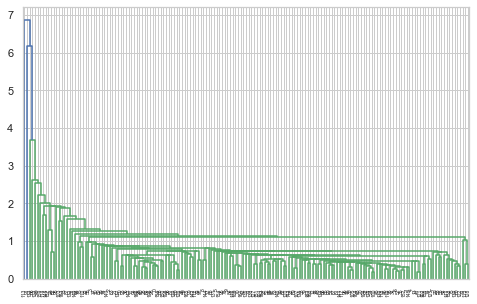

In [65]:
# single linkage
fig = plt.figure(figsize = (8,5))
mergings = linkage(ngo_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

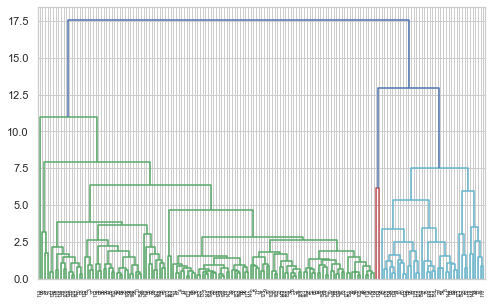

In [66]:
# complete linkage
fig = plt.figure(figsize = (8,5))
mergings1 = linkage(ngo_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings1)
plt.show()

We can see 3 prominent clusters which are in green, red, and skyblue. 

### Cutting the dendrogram vertically such that n_clusters = 3

In [67]:
# 3 clusters
cluster_labels = pd.Series(cut_tree(mergings1, n_clusters=3).reshape(-1, ))
cluster_labels

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int32

In [68]:
df = pd.DataFrame(cluster_labels, columns = ['cluster_labels_hier'])

#cluster_labels_hier.head()

In [69]:
# assign cluster labels
ngo_df_heir = pd.concat([ngo,df],axis = 1)
#ngo_df_heir['cluster_labels_hier'] = cluster_labels
ngo_df_heir.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [70]:
ngo_df_heir['cluster_labels_hier'].value_counts()

0    126
1     39
2      2
Name: cluster_labels_hier, dtype: int64

In [71]:
ngo_df_heir[ngo_df_heir['cluster_labels_hier'] ==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


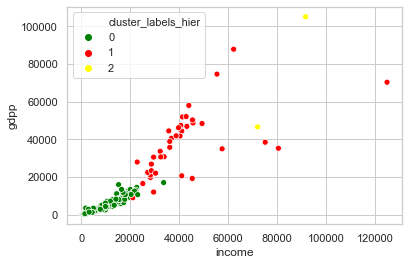

In [72]:
# scatterplot for income,gdpp for different cluster ids

sns.scatterplot(x='income',y='gdpp',hue='cluster_labels_hier',legend='full',data=ngo_df_heir,palette=['green','red','yellow'])

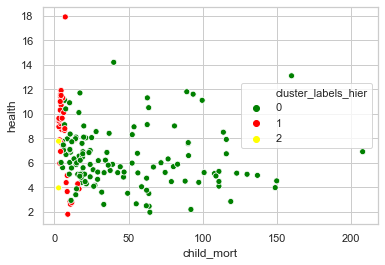

In [73]:
# scatterplot for child mort ,health for different cluster ids
sns.scatterplot(x='child_mort',y='health',hue='cluster_labels_hier',legend='full',data=ngo_df_heir,palette=['green','red','yellow'])

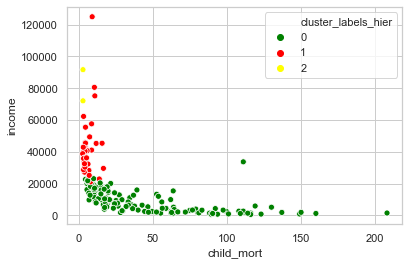

In [74]:
# scatterplot for child mort ,income for different cluster ids
sns.scatterplot(x='child_mort',y='income',hue='cluster_labels_hier',legend='full',data=ngo_df_heir,palette=['green','red','yellow'])

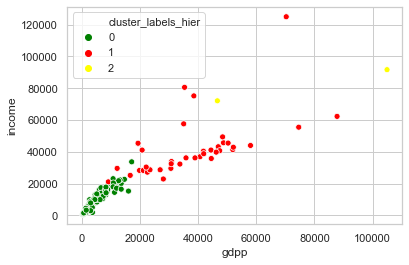

In [75]:
# scatterplot for GDP ,income for different cluster ids
sns.scatterplot(x='gdpp',y='income',hue='cluster_labels_hier',legend='full',data=ngo_df_heir,palette=['green','red','yellow'])

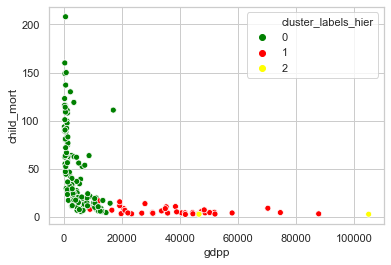

In [76]:
# scatterplot for GDP ,income for different cluster ids
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_labels_hier',legend='full',data=ngo_df_heir,palette=['green','red','yellow'])

From the above scatter plots we can conclude below points :

- In gdpp ~ child_mort, there is some clustering where gdpp is less and there child-mort is high.
- In gdpp ~ income, there is some clustering where gdpp is more, then income is also high.
- In income ~ child_mort, there is some clustering where if income is less and child_mort is more

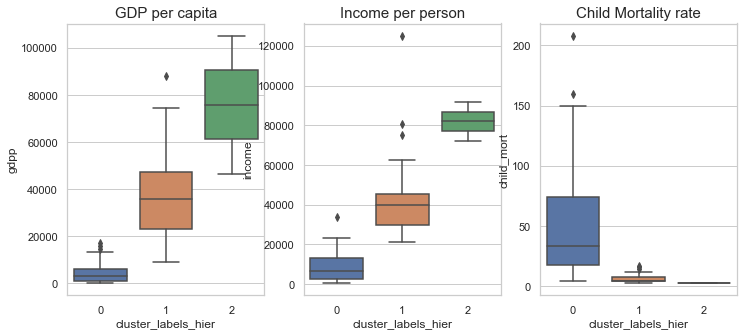

In [77]:
f, axes = plt.subplots(1, 3, figsize=(12,5))
sns.boxplot(x='cluster_labels_hier',y='gdpp',data=ngo_df_heir,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='cluster_labels_hier',y='income',data=ngo_df_heir,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='cluster_labels_hier',y='child_mort',data=ngo_df_heir,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
plt.show()

### Cluster Profiling

Using gdpp, child_mort and income for Cluster Profiling  

<Figure size 720x576 with 0 Axes>

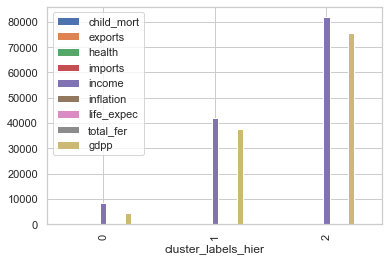

In [78]:

plt.figure(figsize = (10,8))
ngo_df_heir.drop('country', axis = 1).groupby('cluster_labels_hier').mean().plot(kind = 'bar')
plt.show()


In [79]:
ngo_df_heir.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


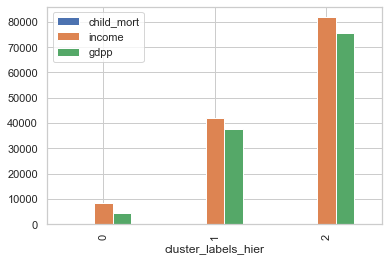

In [80]:
ngo_df_heir.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels_hier').mean().plot(kind = 'bar')
plt.show()

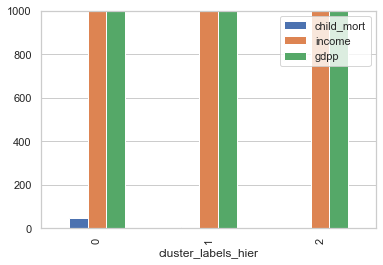

In [81]:
ngo_df_heir.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels_hier').mean().plot(kind = 'bar')
plt.ylim(0, 1000)
plt.show()

Filtering data for Cluster with label 2:  Having Highest child mortality, lowest income, lowest GDP 

In [82]:
ngo_df_heir[ngo_df_heir['cluster_labels_hier']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Identifying the countries which is having highest child mortality, lowest income, lowest GDP 

In [83]:
ngo_df_heir[ngo_df_heir['cluster_labels_hier']==0].sort_values(by=['gdpp','income','child_mort'],ascending =[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hier
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0


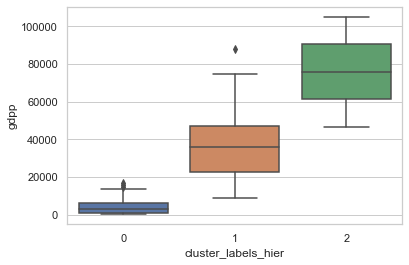

In [84]:
# plots
sns.boxplot(x='cluster_labels_hier', y='gdpp', data=ngo_df_heir)

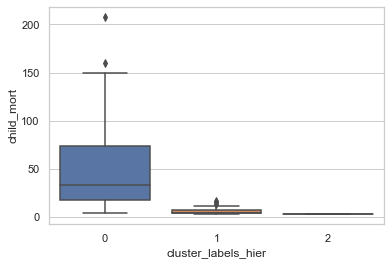

In [85]:
# plots
sns.boxplot(x='cluster_labels_hier', y='child_mort', data=ngo_df_heir)

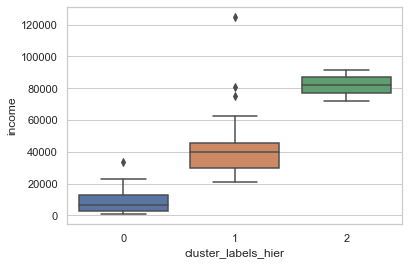

In [86]:
# plots
sns.boxplot(x='cluster_labels_hier', y='income', data=ngo_df_heir)

## Conclusion

- Using the Kmeans and heirachical clustering, the countries which need the aid are most decided on the factors like high child mortality, income and GDP. Both clustering gave the similar result.



- After comparing both the Kmeans and heirachical clutering algorithms, based on  the clusters formed and clarity in the plots we can conclude that K-means is having relative balanced no of countries in all clusters. Hence we can consider K-means as final approach.


- Companies available in K-mean clustering in cluster 2 and in Hierarichal clustering to cluster 0 are the countries which needs aid as it has lowest GDP, lowest income and highest child mortality.As in both the methods, the countries clusterred  for underdeveloped countries was almost same. i.e. deciding no. of clusters as 3 was profitable.

## Recommendation

- The countries which CEO should be focussing based on low GDP, low income and high child motality on are as follows:-



Burundi	
Liberia	
Congo, Dem. Rep.	
Niger	
Sierra Leone	
Madagascar